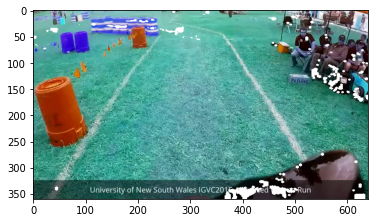

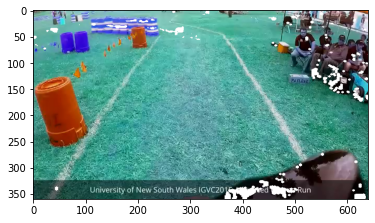

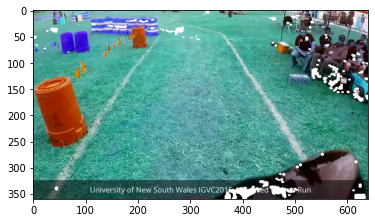

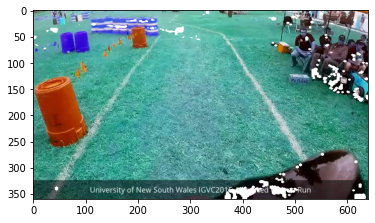

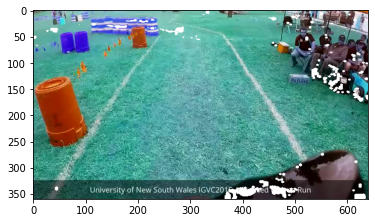

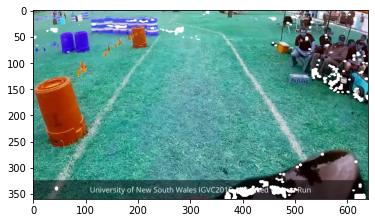

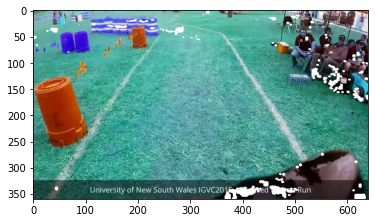

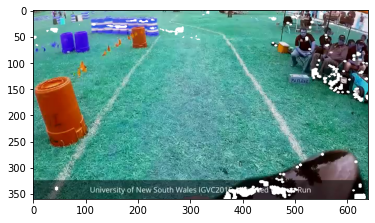

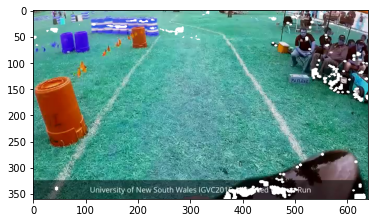

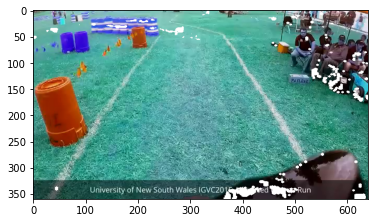

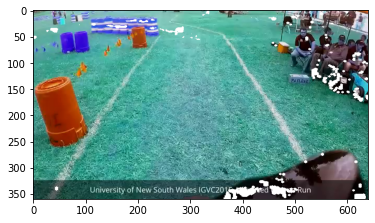

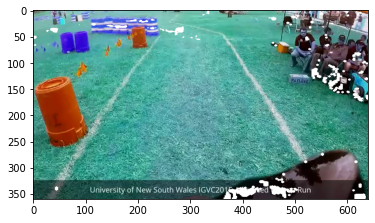

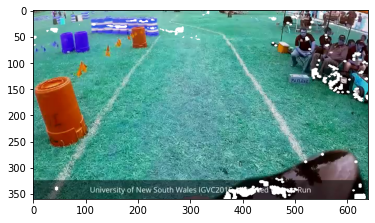

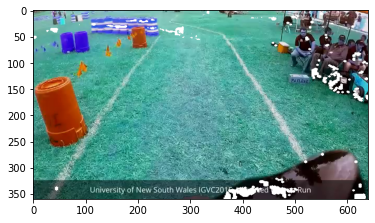

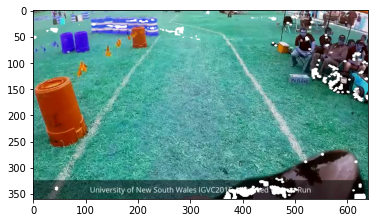

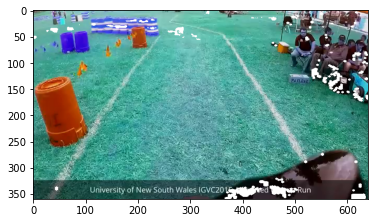

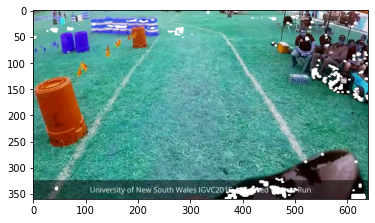

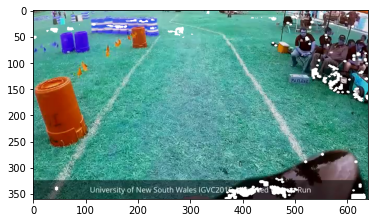

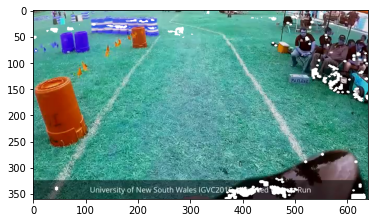

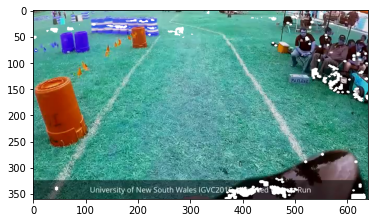

KeyboardInterrupt: 

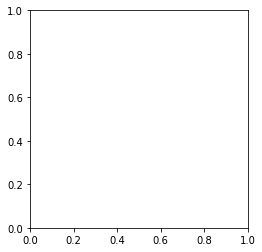

In [56]:
import cv2
from matplotlib import pyplot as plt


barrel_img = cv2.imread('./media/barrel.jpg')
barrel_hsv = cv2.cvtColor(barrel_img, cv2.COLOR_BGR2HSV)
barrel_hist = cv2.calcHist([barrel_hsv],[0,1], None, [180,256], [0,180,0,256])
cv2.normalize(barrel_hist, barrel_hist, 0, 255, cv2.NORM_MINMAX)


disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))


capture = cv2.VideoCapture('./media/video.mp4')

if capture.isOpened():
    while valid:
        valid, frame = capture.read()
        
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        res = cv2.calcBackProject([hsv_frame], [0,1], barrel_hist, [0, 180, 0, 256], scale=1)
        
        cv2.filter2D(res, -1, disc, res)
        
        _1,thresh = cv2.threshold(res,thresh=60,maxval=255,type=cv2.THRESH_BINARY)
        
        final = cv2.merge((thresh,thresh,thresh))
        
        result = cv2.bitwise_or(frame, final)

        
        plt.figure()
        plt.imshow(result)
        plt.show()

capture.release()